In [1]:
import pandas as pd
import numpy as np

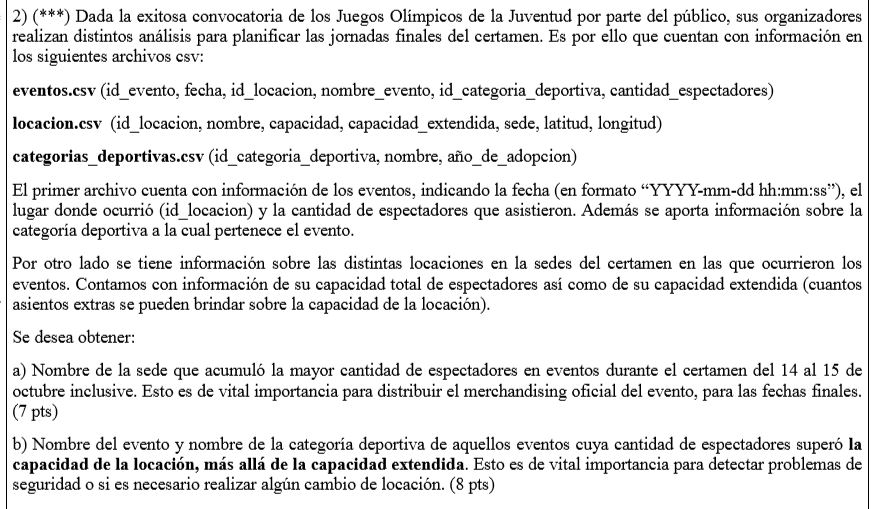

In [106]:
eventos = pd.read_csv('eventos.csv')
eventos.head()

,id_evento,fecha,id_location,nombre_evento,id_categoria_deportiva,cantidad_espectadores
0,1000,10/17/2019,310,alpha,2517,187
1,1001,10/17/2019,308,betha,2514,545
2,1002,10/18/2019,312,gamma,2515,227
3,1003,10/16/2019,320,delta,2514,389
4,1004,10/18/2019,314,etha,2511,581


In [107]:
location = pd.read_csv('location.csv')
location.head()

,id_location,nombre,capacidad,capacidad_extendida,sede,latitud,longitud
0,300,San Diego Chargers,275,325,run,1602,1722
1,301,Kansas City Chiefs,230,230,meg,1272,1776
2,302,Arizona Cardinals,236,236,fred,1319,1425
3,303,Houston Texans,259,328,rick,1921,1288
4,304,Tennessee Titans,268,350,tom,1353,1376


In [108]:
categorias = pd.read_csv('categorias_deportivas.csv')
categorias.head()

,id_categoria_deportiva,nombre,anio_de_adopcion
0,2500,Tennis,1992
1,2501,Baseball,1992
2,2502,Mixed Martial Arts,2000
3,2503,Cheerleading,2000
4,2504,Basketball,1993
5,2505,Snowboarding,1996
6,2506,Volleyball,1990
7,2507,Wiffleball,1992
8,2508,Field Hockey,1998
9,2509,Cricket,2000


In [109]:
eventos.head()

,id_evento,fecha,id_location,nombre_evento,id_categoria_deportiva,cantidad_espectadores
0,1000,10/17/2019,310,alpha,2517,187
1,1001,10/17/2019,308,betha,2514,545
2,1002,10/18/2019,312,gamma,2515,227
3,1003,10/16/2019,320,delta,2514,389
4,1004,10/18/2019,314,etha,2511,581


In [110]:
# extraigo fecha por mes, dia y anio
eventos['fecha'] = pd.to_datetime(eventos['fecha'])
eventos['mes'] = eventos['fecha'].dt.month
eventos['anio'] = eventos['fecha'].dt.year
eventos['dia'] = eventos['fecha'].dt.day
eventos.head()

,id_evento,fecha,id_location,nombre_evento,id_categoria_deportiva,cantidad_espectadores,mes,anio,dia
0,1000,2019-10-17,310,alpha,2517,187,10,2019,17
1,1001,2019-10-17,308,betha,2514,545,10,2019,17
2,1002,2019-10-18,312,gamma,2515,227,10,2019,18
3,1003,2019-10-16,320,delta,2514,389,10,2019,16
4,1004,2019-10-18,314,etha,2511,581,10,2019,18


In [111]:
#se filtran los eventos ocurridos el 15 y el 15
eventos_14_y15 = eventos[((eventos['dia']==16) | (eventos['dia']==15)) & (eventos['mes']==10)]
eventos_14_y15_short = eventos_14_y15[['id_location','cantidad_espectadores']] 
eventos_14_y15_short.head()

,id_location,cantidad_espectadores
3,320,389
7,308,803
8,308,768
10,309,816
14,306,778


In [112]:
eventos_14_y15_max = eventos_14_y15_short.groupby('id_location')['cantidad_espectadores'].agg('max')
eventos_14_y15_max.head(10)

id_location
303    683
306    778
307    367
308    803
309    816
311    910
313    348
315    720
320    389
Name: cantidad_espectadores, dtype: int64

In [114]:
eventos_location = pd.merge(eventos_14_y15_max, location, on='id_location')
eventos_location_short = eventos_location[['id_location','nombre','cantidad_espectadores']]
eventos_location_short.head()

,id_location,nombre,cantidad_espectadores
0,303,Houston Texans,683
1,306,San Francisco 49ers,778
2,307,Carolina Panthers,367
3,308,Dallas Cowboys,803
4,309,Detroit Lions,816


In [115]:
maxima_concurrencia = eventos_location_short[eventos_location_short['cantidad_espectadores']== eventos_location_short['cantidad_espectadores'].agg('max')]
maxima_concurrencia

,id_location,nombre,cantidad_espectadores
5,311,Cincinnati Bengals,910


In [116]:
# Nombre del evento y de la categoria deportiva de aquellos eventos cuya cantidad de espectadores supero la capacidad de la locacion
# mas alla de la capacidad extendida
# Merge entre archivos location y eventos y me reservo los campos a usar
eventos_y_location = pd.merge(eventos,location,on='id_location')
eventos_y_location = eventos_y_location[['nombre_evento','id_categoria_deportiva','cantidad_espectadores','capacidad_extendida' ]]
eventos_y_location.head()

,nombre_evento,id_categoria_deportiva,cantidad_espectadores,capacidad_extendida
0,alpha,2517,187,213
1,epsylon,2517,151,213
2,loop,2511,347,213
3,betha,2514,545,262
4,iota,2517,803,262


In [117]:
# Filtro los registros que cumplen que cantidad_espectadores>capacidad_extendida
eventos_categorias_capacidad_superada = eventos_y_location[(eventos_y_location['cantidad_espectadores']>eventos_y_location['capacidad_extendida'])]
eventos_categorias_capacidad_superada =eventos_categorias_capacidad_superada[['nombre_evento','id_categoria_deportiva']]
eventos_categorias_capacidad_superada.head()

,nombre_evento,id_categoria_deportiva
2,loop,2511
3,betha,2514
4,iota,2517
5,omega,2518
7,delta,2514


In [120]:
evento_y_categoria_deportiva_con_exceso_de_espectadores = pd.merge(eventos_categorias_capacidad_superada,categorias,on='id_categoria_deportiva')
evento_y_categoria_deportiva_con_exceso_de_espectadores = evento_y_categoria_deportiva_con_exceso_de_espectadores[['nombre_evento','nombre']] 
evento_y_categoria_deportiva_con_exceso_de_espectadores.head()

,nombre_evento,nombre
0,loop,Crew
1,etha,Crew
2,trine,Crew
3,betha,Surfing
4,delta,Surfing
